## WeatherPy

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Output_files/cities_weather.csv'

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="
units = "imperial"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## General Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

## Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it's being processed

In [13]:
# set lists for the dataframe
city_count = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
dates = []

# set initial count quantities for organization
counts = 0
sets = 1


print("Beginning Data Retrieval ")
print("-----------------------------")

# loops for creating dataframe columns
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        
        if counts > 48:
            counts = 1
            sets += 1
            city_count.append(city)
        else:
            counts += 1
            city_count.append(city)
            
        print(f"Processing Record {counts} of Set {sets} | {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | kamenka
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | maragogi
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | sangar
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | kungurtug
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | mys shmidta
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | lebu
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 | nhulunbuy
Processing Record 17 of Set 1 | tignere
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | praia da vitoria
Processing Record 20 of Set 1 | ketchikan
Processing Record 21 of Set 1 | port elizabeth
City not found. Skippi

Processing Record 37 of Set 4 | diapaga
Processing Record 38 of Set 4 | lons
Processing Record 39 of Set 4 | muravlenko
Processing Record 40 of Set 4 | comodoro rivadavia
City not found. Skipping...
Processing Record 41 of Set 4 | superior
Processing Record 42 of Set 4 | grand river south east
Processing Record 43 of Set 4 | mongo
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | beringovskiy
City not found. Skipping...
Processing Record 47 of Set 4 | izhma
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | tula
Processing Record 1 of Set 5 | baruun-urt
City not found. Skipping...
Processing Record 2 of Set 5 | klaksvik
City not found. Skipping...
Processing Record 3 of Set 5 | bandarbeyla
Processing Record 4 of Set 5 | sovetskaya gavan
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | kuliyapitiya
Processing Record 8 of Set 5 | helena
Processin

Processing Record 28 of Set 8 | teguldet
Processing Record 29 of Set 8 | namuac
Processing Record 30 of Set 8 | ambon
City not found. Skipping...
Processing Record 31 of Set 8 | sao gabriel da cachoeira
Processing Record 32 of Set 8 | sao simao
Processing Record 33 of Set 8 | port moresby
City not found. Skipping...
Processing Record 34 of Set 8 | landsberg
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | pombia
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | samarai
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | aykhal
Processing Record 42 of Set 8 | sembe
City not found. Skipping...
Processing Record 43 of Set 8 | ekhabi
Processing Record 44 of Set 8 | vanavara
Processing Record 45 of Set 8 | palora
Processing Record 46 of Set 8 | shimoda
Processing Record 47 of Set 8 | grand gaube
City not found. Skipping...
Processing Record 48 of Set 8 | kralendijk
Pr

Processing Record 18 of Set 12 | emerald
Processing Record 19 of Set 12 | neryungri
Processing Record 20 of Set 12 | sterling
-----------------------------
Data Retrieval Complete
-----------------------------


## Convert Raw Data to DataFrame
- Export the city data into a csv.
- Display the DataFrame

In [38]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_count,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp (F)" : max_temp,
                "Humidity (%)" : humidity,
                "Cloudiness (%)" : cloudiness,
                "Wind Speed (MPH)" : wind_speed,
                "Country" : country,
                "Date" : dates,
})

weather_df['City']
weather_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,busselton,-33.6500,115.3333,61.00,75,57,4.00,AU,1612916456
1,kamenka,51.3223,42.7678,12.00,90,100,10.45,RU,1612916148
2,port alfred,-7.0349,29.7638,73.94,73,100,4.00,CD,1612916114
3,broome,42.2506,-75.8330,21.20,73,90,8.05,US,1612916297
4,maragogi,-9.0122,-35.2225,78.40,77,27,6.02,BR,1612916636


In [39]:
weather_df.to_csv('../Output_files/cities_weather.csv', index=False, header=True)

In [40]:
# this image was in the starter file but not explicitly stated...
weather_df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,21.799469,24.360055,48.051574,74.765653,56.071556,7.474490,1.612916e+09
std,31.972294,87.252085,31.606712,19.628827,38.476710,5.279656,1.798748e+02
min,-54.800000,-175.200000,-36.400000,15.000000,0.000000,0.430000,1.612916e+09
25%,-3.558350,-46.333600,25.215000,68.000000,19.500000,3.440000,1.612916e+09
50%,25.700000,29.635000,59.000000,81.000000,75.000000,6.150000,1.612917e+09
75%,48.649550,98.078800,75.055000,88.000000,92.500000,10.360000,1.612917e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,37.980000,1.612917e+09


## Inspect the data and remove the cities where the humidity > 100%
***
Skip this step if there are no cities that have humidity > 100%.

In [41]:
# once again
weather_df.describe()

# no cities over 100%

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,21.799469,24.360055,48.051574,74.765653,56.071556,7.474490,1.612916e+09
std,31.972294,87.252085,31.606712,19.628827,38.476710,5.279656,1.798748e+02
min,-54.800000,-175.200000,-36.400000,15.000000,0.000000,0.430000,1.612916e+09
25%,-3.558350,-46.333600,25.215000,68.000000,19.500000,3.440000,1.612916e+09
50%,25.700000,29.635000,59.000000,81.000000,75.000000,6.150000,1.612917e+09
75%,48.649550,98.078800,75.055000,88.000000,92.500000,10.360000,1.612917e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,37.980000,1.612917e+09


In [43]:
# training_df["Trainer"].value_counts()
weather_df['Humidity (%)'].unique()

# confirmed

array([ 75,  90,  73,  77,  72,  84,  82,  91,  86,  69,  87,  94,  80,
        74,  23,  53,  49,  66,  70,  38,  88,  48,  50,  83,  33,  64,
       100,  81,  62,  35,  93,  89,  78,  43,  85,  27,  55,  92,  56,
        95,  98,  61,  68,  96,  30,  39,  19,  32,  24,  54,  65,  51,
        71,  63,  26,  18,  79,  15,  28,  42,  76,  67,  97,  45,  59,
        37,  58,  57,  25,  22,  44,  46,  41,  36,  47,  17,  60,  21],
      dtype=int64)

# Plotting the Data
***
- Use proper labeling of the plots using plot titels (including date of analysis) and axes labels
- Save the plotted figures as .pngs

###  Latitude vs. Max Temp Plot

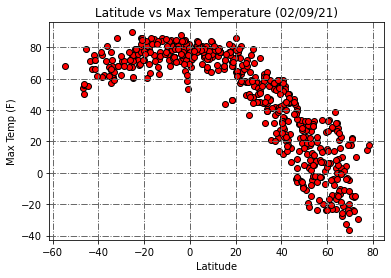

In [52]:
xlattemp_value = weather_df['Lat']
ylattemp_value = weather_df['Max Temp (F)']

plt.scatter(xlattemp_value, ylattemp_value, facecolors="red", marker="o", edgecolor="black")
plt.title('Latitude vs Max Temperature (02/09/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='dimgrey', linestyle='-.', linewidth=1)
plt.savefig('../Images/latVStemp_scatter')
plt.show()

### Latitude vs. Humidity Plot

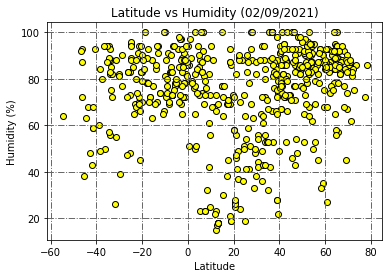

In [51]:
xlathum_value = weather_df['Lat']
ylathum_value = weather_df['Humidity (%)']

plt.scatter(xlathum_value, ylathum_value, facecolors="yellow", marker="o", edgecolor="black")
plt.title('Latitude vs Humidity (02/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='dimgrey', linestyle='-.', linewidth=1)
plt.savefig('../Images/latVShumid_scatter')
plt.show()

### Latitude vs. Cloudiness Plot

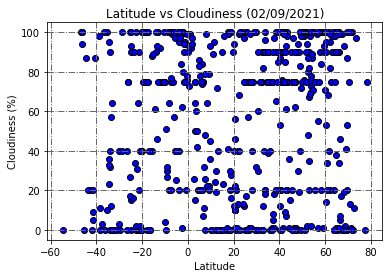

In [53]:
xlatcloud_value = weather_df['Lat']
ylatcloud_value = weather_df['Cloudiness (%)']

plt.scatter(xlatcloud_value, ylatcloud_value, facecolors="blue", marker="o", edgecolor="black")
plt.title('Latitude vs Cloudiness (02/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='dimgrey', linestyle='-.', linewidth=1)
plt.savefig('../Images/latVScloud_scatter')
plt.show()

### Latitude vs. Wind Speed Plot

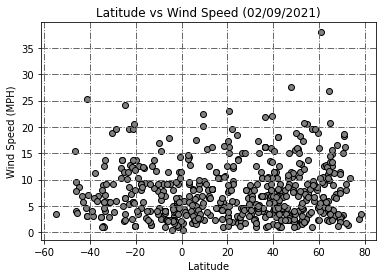

In [54]:
xlatwind_value = weather_df['Lat']
ylatwind_value = weather_df['Wind Speed (MPH)']

plt.scatter(xlatwind_value, ylatwind_value, facecolors="grey", marker="o", edgecolor="black")
plt.title('Latitude vs Wind Speed (02/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid(color='dimgrey', linestyle='-.', linewidth=1)
plt.savefig('../Images/latVSwind_scatter')
plt.show()

### Linear Regression

In [55]:
# first define the function to call for multiple graphs
def linear_regress(x,y,):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_fit = x * slope + intercept
    line_eq = 'y= ' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))
    print(f'The r-squared is : {round(st.pearsonr(x,y)[0],2)}')
    plt.scatter(x,y)
    plt.plot(x,regress_fit,'r-')
    return line_eq

def annotate(line_eq, x_a, y_b):
    plt.annotate(line_eq,(x_a,y_b), fontsize=12, color='red')

# creating df to hold the N and S cities
northern_hemis_df = weather_df.loc[weather_df['Lat'] >= 0]
southern_hemis_df = weather_df.loc[weather_df['Lat'] < 0]

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression